In [3]:
#First we import our modules 
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division

In [4]:
#Next we define our variables with the globals method and set the time.
Stocks = ['AAPL','GOOG','MSFT','ATVI','NVDA']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)
for stock in Stocks:
    globals()[stock]= DataReader(stock,'yahoo',start,end)
    

In [5]:
NVDA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-08,212.000000,207.240005,211.850006,209.160004,13074700.0,208.641754
2017-11-09,206.330002,200.369995,205.270004,205.320007,24464100.0,204.811279
2017-11-10,218.669998,211.630005,213.080002,216.139999,31331400.0,215.604462
2017-11-13,217.169998,212.009995,216.139999,212.630005,14559400.0,212.103165
2017-11-14,214.800003,211.229996,213.000000,214.179993,13232300.0,213.649307


In [6]:
NVDA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,242.010277,234.680830,238.680672,238.361542,1.299205e+07,238.141765
std,23.456879,24.134437,23.556684,23.802471,6.094536e+06,23.883582
min,189.339996,176.009995,182.399994,185.619995,4.518800e+06,185.619995
25%,226.270004,217.500000,223.600006,221.940002,8.939300e+06,221.543900
50%,246.429993,238.410004,243.179993,242.160004,1.137790e+07,241.878036
75%,256.100006,250.380005,252.789993,253.690002,1.549430e+07,253.551315
max,292.760010,285.579987,289.320007,289.359985,4.186510e+07,289.359985


In [7]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-11-08 to 2018-11-08
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


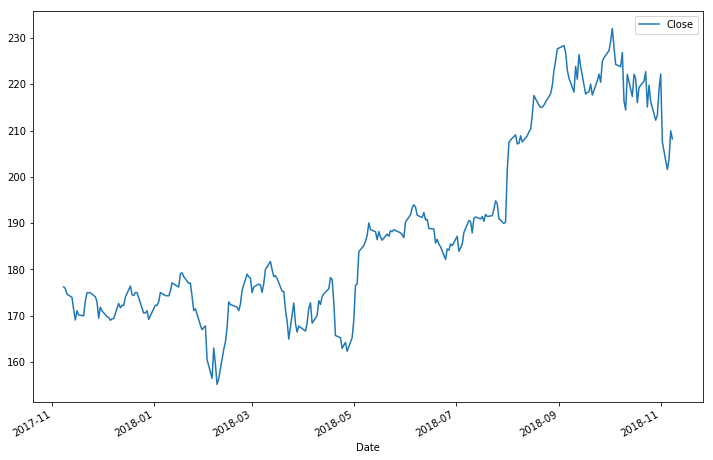

In [8]:
#Now that we have our data, we can begin to plot
AAPL['Close'].plot(legend=True,figsize=(12,8))

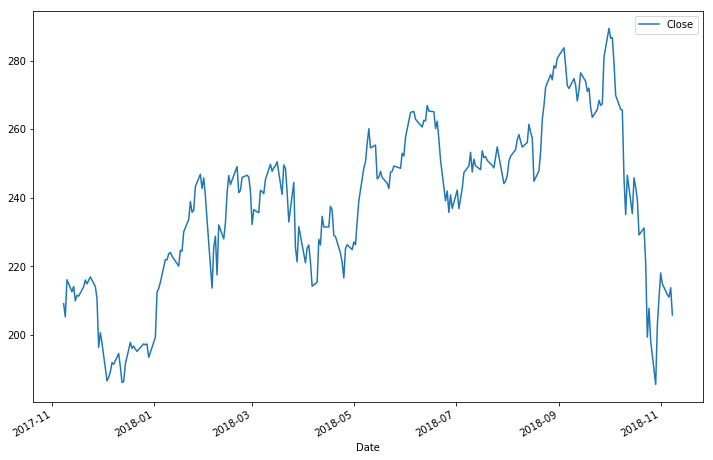

In [9]:
NVDA['Close'].plot(legend=True,figsize=(12,8))

In [10]:
#Finding the moving average of our tech stocks over a 10,20, and 50 day period.
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [11]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2018-11-02,213.649994,205.429993,209.550003,207.479996,91328700.0,206.758575,216.112943,217.653568,220.390819
2018-11-05,204.389999,198.169998,204.300003,201.589996,66163700.0,200.889053,214.213570,216.548424,220.100432
2018-11-06,204.720001,201.690002,201.919998,203.770004,31882900.0,203.061493,212.324164,215.397440,219.818018
2018-11-07,210.059998,204.130005,205.970001,209.949997,33355400.0,209.219986,211.811951,215.078054,219.623695
2018-11-08,210.119995,206.750000,209.979996,208.190002,21879455.0,208.190002,210.727376,214.802337,219.343402


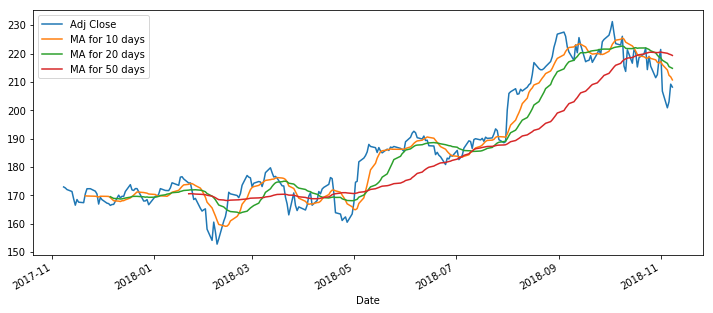

In [12]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

In [13]:
#Finding daily return of stocks
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
NVDA['Daily Return'] = NVDA['Adj Close'].pct_change()
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
ATVI['Daily Return'] = ATVI['Adj Close'].pct_change()

In [14]:
AAPL['Daily Return'].head()

Date
2017-11-08         NaN
2017-11-09   -0.002043
2017-11-10   -0.003310
2017-11-13   -0.004007
2017-11-14   -0.015118
Name: Daily Return, dtype: float64

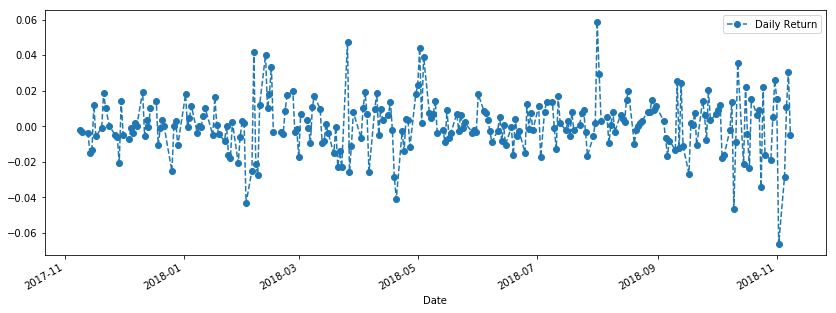

In [15]:
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

C:\Users\Naval\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


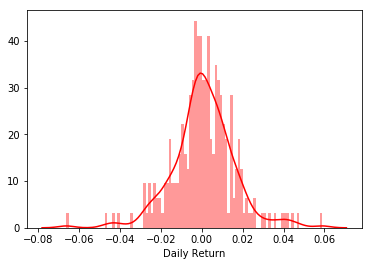

In [16]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

In [17]:
close_df = DataReader(Stocks,'yahoo',start,end)['Adj Close']


In [18]:
close_df.head()

Symbols,AAPL,ATVI,GOOG,MSFT,NVDA
Date,,,,,
2017-11-08,173.011261,64.218925,1039.849976,83.062996,208.641754
2017-11-09,172.657867,62.985287,1031.260010,82.601318,204.811279
2017-11-10,172.086426,62.676876,1028.069946,82.385223,215.604462
2017-11-13,171.396790,63.293694,1025.750000,82.444153,212.103165
2017-11-14,168.805664,63.701591,1026.000000,82.562035,213.649307


In [19]:
rets_df= close_df.pct_change()
rets_df.tail()

Symbols,AAPL,ATVI,GOOG,MSFT,NVDA
Date,,,,,
2018-11-02,-0.066331,-0.004761,-0.011411,0.002266,-0.014626
2018-11-05,-0.028388,-0.067401,-0.016733,0.012717,-0.014657
2018-11-06,0.010814,-0.001399,0.015114,0.001953,-0.003353
2018-11-07,0.030328,0.013074,0.035593,0.039361,0.012935
2018-11-08,-0.004780,-0.031034,-0.011629,-0.002992,-0.037233


C:\Users\Naval\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'Google and Apple seem to have a minor correlation'

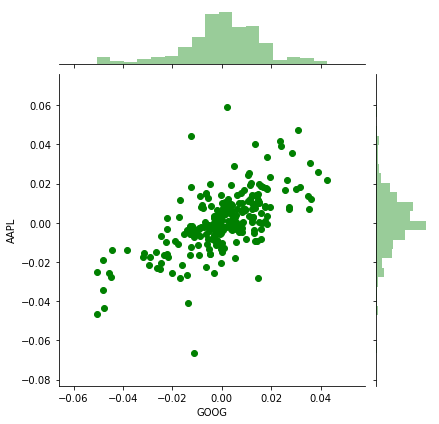

In [20]:
#Different type of visualization between two stocks
sns.jointplot('GOOG','AAPL', rets_df,kind='scatter',color='green')
'Google and Apple seem to have a minor correlation'

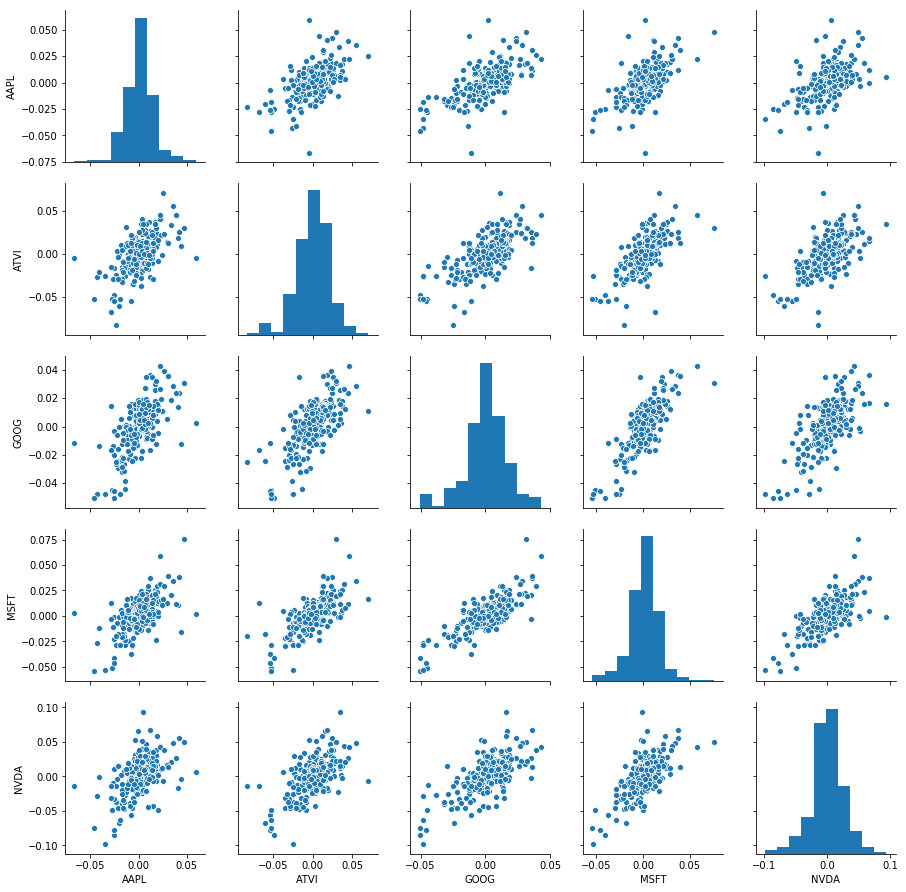

In [21]:
# This pairplot gives a quick visualization of the scatterplots and hisograms of our stocks.
sns.pairplot(rets_df.dropna())

C:\Users\Naval\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Apple')

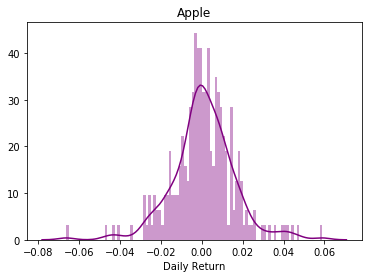

In [22]:
#Lastly we will use the daily return of our stocks to view the amount of risk associated with each stock.
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
plt.title('Apple')

C:\Users\Naval\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Nvidia')

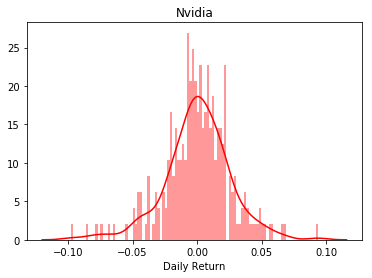

In [23]:
sns.distplot(NVDA['Daily Return'].dropna(),bins=100,color='red')
plt.title('Nvidia')

C:\Users\Naval\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Google')

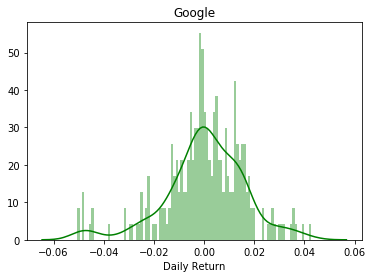

In [24]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='green')
plt.title('Google')

C:\Users\Naval\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Microsoft')

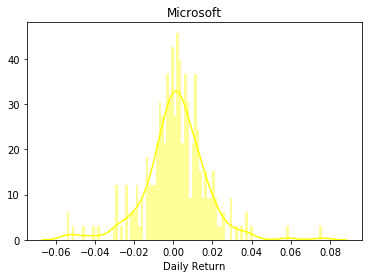

In [25]:
sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='yellow')
plt.title('Microsoft')

C:\Users\Naval\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Activision')

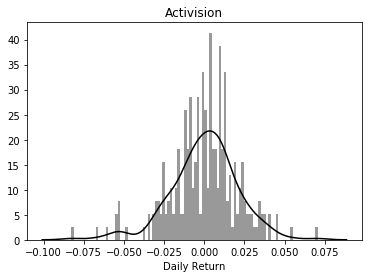

In [26]:
sns.distplot(ATVI['Daily Return'].dropna(),bins=100,color='black')
plt.title('Activision')

In [27]:
rets= rets_df.dropna()

In [28]:
rets.head()

Symbols,AAPL,ATVI,GOOG,MSFT,NVDA
Date,,,,,
2017-11-09,-0.002043,-0.019210,-0.008261,-0.005558,-0.018359
2017-11-10,-0.003310,-0.004897,-0.003093,-0.002616,0.052698
2017-11-13,-0.004007,0.009841,-0.002257,0.000715,-0.016239
2017-11-14,-0.015118,0.006445,0.000244,0.001430,0.007290
2017-11-15,-0.013190,-0.017804,-0.004961,-0.007772,-0.019610


Apple and microsoft seem to be stable stocks to invest in that offer decent returns. To be sure however, we should check the percent risk of each stocks we deem worthy. 

In [30]:
rets['AAPL'].quantile(0.05)

-0.02409839866122233

In [31]:
rets['NVDA'].quantile(0.05)

-0.04453736722197854

In [32]:
rets['MSFT'].quantile(0.05)

-0.024176273463387826

Looking at Apple, We can say with 95% confidence that the worst daily loss wont be greater than 2.41% of the investment. Microsoft also offers a similar percentage of 2.42%. Nvidia however has a much higher potential loss of 4.45% of the investment. 